Analysis of the image frame for which meteor image has been detected using ht-and-detect-in-frame-set.ipynb

In [1]:
from astropy.io import fits
from astropy.time import Time
import os
import cv2

from math import *
import numpy as np
import cv2

from skimage.feature import peak_local_max

from IPython.display import clear_output, display

import szm

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib widget
from scipy.optimize import curve_fit

In [2]:
def ht(x,y,w,h):
    theta = np.arange(0,pi,pi/1800)
    cos_,sin_ = np.cos(theta),np.sin(theta)
    Np = np.size(theta)
    d = sqrt(w**2+h**2)
    ht = np.zeros((int(d),Np))
    for k in range(Np):
        r = x*cos_[k]+y*sin_[k]
        ht[:,k], bin_edges = np.histogram(r, bins=int(d), range=(0,d))
    return ht

r =    453.000, theta =     79.500


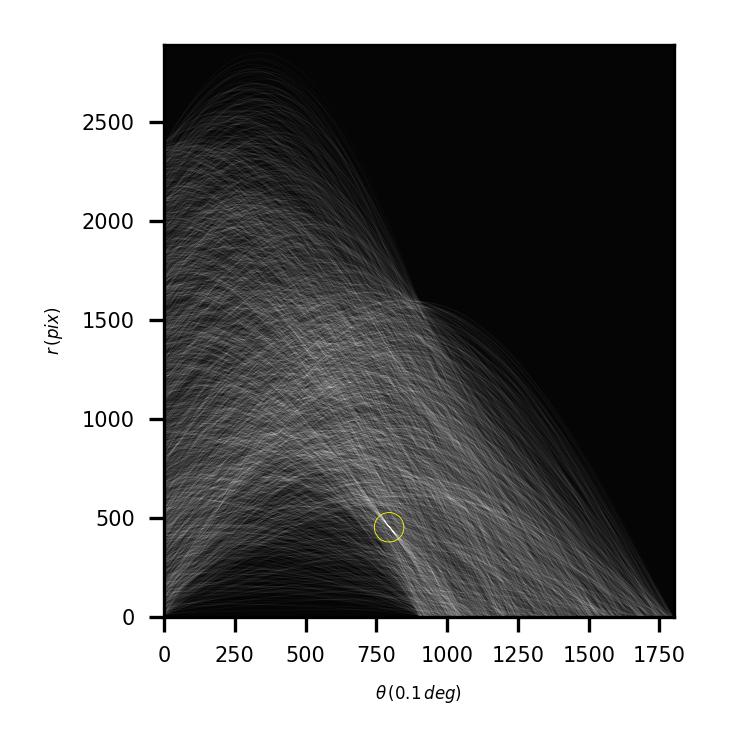

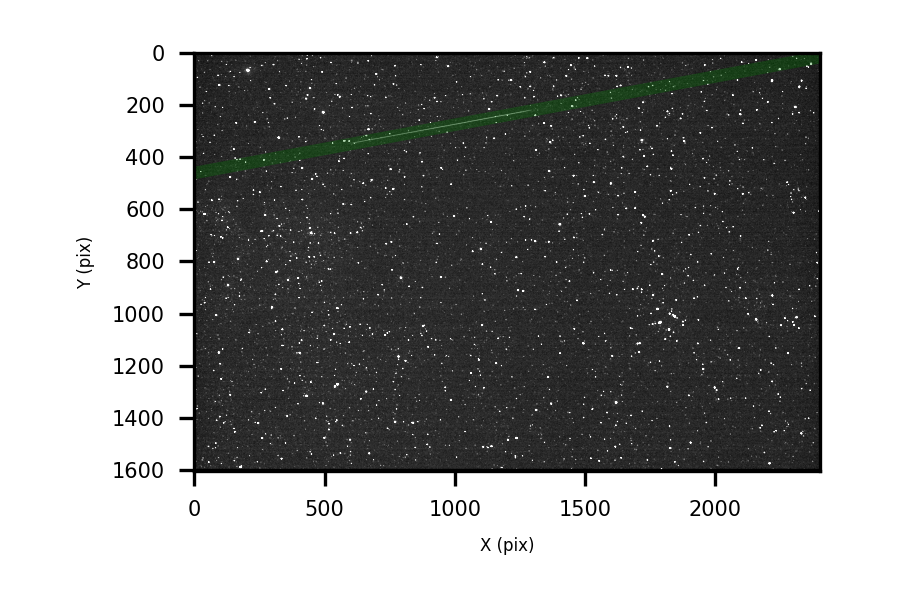

In [7]:
filename = 'fits/Per5_00281.fits'
# open file
hdul = fits.open(filename)
img = (hdul[0].data).astype('uint16')
h,w = np.shape(img)
# do source extraction
X,Y,l,pa = szm.szm2(img)
# do Hough transform
hs = ht(X,Y,w,h)
r,Theta = np.unravel_index(np.argmax(hs), np.shape(hs))
theta = radians(0.1*Theta)
print('r = %10.3f, theta = %10.3f'%(r,degrees(theta)))

# visualization of the Hough-diagram maximum 
cf1,cf2 = 0.1,5
fig, ax = plt.subplots(figsize=(2.5,2.5), dpi=300)
ax.xaxis.set_tick_params(labelsize=5)
ax.yaxis.set_tick_params(labelsize=5)
plt.xlabel('$\\theta \\,(0.1 \\,deg)$', fontsize = 4)
plt.ylabel('$r\\, (pix)$', fontsize=4)
plt.imshow(hs, origin='lower', cmap='gray',vmin=np.median(hs)- cf1*np.std(hs) ,
           vmax=np.median(hs)  + cf2*np.std(hs))
ax.scatter(Theta,r,  s=50,facecolors='none', linewidths=0.2,edgecolors='yellow')
ax.set_aspect(0.7)
fig.tight_layout()

# calculation of the line key points (two points by x1,y1 and x2,y2 coordinates located at the image boundaries)

x1=0;y1=r/sin(theta)
x2=w-1;y2=-cos(theta)*x2/sin(theta)+r/sin(theta)

if not (0<y1<h):
    y1 = 0;x1 = r/cos(theta)
    if not (0<x1<w):
        y1 = h-1;x1 = -sin(theta)*y1/cos(theta)+r/cos(theta)

if not (0<y2<h):
    y2 = h-1;x2 = -sin(theta)*y2/cos(theta)+r/cos(theta)
    if not (0<x2<w):
        y2 = 0;x2 = r/cos(theta)

# line visualization

cf1,cf2,ap = 0.05,0.25,10
fig, ax = plt.subplots(figsize=(3.0,2.0), dpi=300)
ax.xaxis.set_tick_params(labelsize=5)
ax.yaxis.set_tick_params(labelsize=5)
plt.xlabel('X (pix)', fontsize = 4)
plt.ylabel('Y (pix)', fontsize=4)
plt.imshow(img, origin='upper', cmap='gray',vmin=np.median(img)- cf1*np.std(img) ,
           vmax=np.median(img)  + cf2*np.std(img))
ax.plot([x1,x2],[y1,y2],alpha=0.3,c='g',linewidth=3.0)
fig.tight_layout()

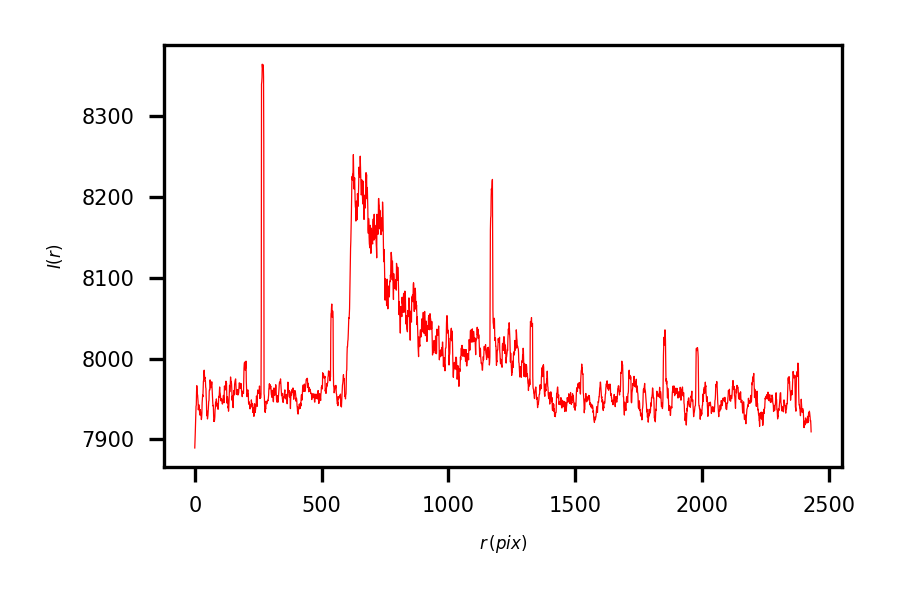

In [8]:
# visualization of the meteor event signal along detected line
length = int(sqrt((x2-x1)**2+(y2-y1)**2))
x, y = np.linspace(x1, x2, length), np.linspace(y1, y2, length)
imline = img[y.astype(np.int32), x.astype(np.int32)]

kernels = 10
imlc = np.convolve(imline, np.ones(kernels)/kernels, mode='valid')
lengthc = np.size(imlc)


fig, ax = plt.subplots(figsize=(3.0,2.0), dpi=300)
ax.xaxis.set_tick_params(labelsize=5)
ax.yaxis.set_tick_params(labelsize=5)
plt.xlabel('$r\\,(pix)$', fontsize = 4)
plt.ylabel('$I(r)$', fontsize=4)
ax.plot(np.linspace(0,lengthc,lengthc),imlc,c='r',linewidth=0.3)
fig.tight_layout()